<a href="https://colab.research.google.com/github/Shankar203/Microsoft-Engage-FaceRecognition/blob/ml/DeepFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detect

In [ ]:
import tensorflow as tf


img1 = tf.io.read_file('./Amanda Crew0_0.jpg')
img1 = tf.io.decode_image(img1)
img2 = tf.io.read_file('./Adriana Lima0_0.jpg')
img2 = tf.io.decode_image(img2)

def preprocess(img):
    img = tf.image.resize_with_pad(img, 112, 112)
    img = img / 255
    # img -= 127.5
    # img /= 128
    return img
img1 = preprocess(img1)
img2 = preprocess(img2)

def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

arcface_model = tf.keras.models.load_model('/content/drive/MyDrive/arcface.h5')
def compare(img1,img2):
    rep1 = arcface_model.predict(img1[None,...]).reshape(-1)
    rep2 = arcface_model.predict(img2[None,...]).reshape(-1)
    dist1 = findCosineDistance(rep1,rep2)
    dist2 = tf.losses.cosine_similarity(rep1,rep2)
    return dist1,dist2

___
___
___

# keras model to tfjs

In [1]:
pip install tensorflowjs

     |████████████████████████████████| 77 kB 2.8 MB/s 
     |████████████████████████████████| 462 kB 10.8 MB/s 


In [4]:
!tensorflowjs_converter --input_format keras \
                       /content/drive/MyDrive/arcface.h5 \
                       /content/ArcFaceJS

In [5]:
!zip -r arcface.zip arcface

  adding: arcface/ (stored 0%)
  adding: arcface/group1-shard1of33.bin (deflated 6%)
  adding: arcface/group1-shard31of33.bin (deflated 7%)
  adding: arcface/group1-shard33of33.bin (deflated 7%)
  adding: arcface/group1-shard5of33.bin (deflated 7%)
  adding: arcface/group1-shard32of33.bin (deflated 7%)
  adding: arcface/group1-shard17of33.bin (deflated 4%)
  adding: arcface/group1-shard20of33.bin (deflated 4%)
  adding: arcface/group1-shard30of33.bin (deflated 7%)
  adding: arcface/group1-shard24of33.bin (deflated 7%)
  adding: arcface/group1-shard12of33.bin (deflated 7%)
  adding: arcface/group1-shard8of33.bin (deflated 7%)
  adding: arcface/group1-shard16of33.bin (deflated 6%)
  adding: arcface/group1-shard4of33.bin (deflated 7%)
  adding: arcface/group1-shard21of33.bin (deflated 6%)
  adding: arcface/group1-shard10of33.bin (deflated 7%)
  adding: arcface/model.json (deflated 96%)
  adding: arcface/group1-shard27of33.bin (deflated 7%)
  adding: arcface/group1-shard14of33.bin (deflate

# Rough

In [6]:
!pip install deepface

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 2.3 MB 11.0 MB/s 


In [ ]:
pip install mediapipe

     |████████████████████████████████| 32.7 MB 217 kB/s 


In [ ]:
from deepface import DeepFace
from deepface.commons import functions, realtime, distance as dst

In [ ]:
a1 = functions.preprocess_face('./Amanda Crew0_0.jpg', target_size=(112,112))
a2 = functions.preprocess_face('./Amanda Crew107_7.jpg',  target_size=(112,112))
a3 = functions.preprocess_face('./Adriana Lima0_0.jpg',  target_size=(112,112))
a4 = functions.preprocess_face('./Amanda Crew107_7.jpg',  target_size=(112,112))


# aa = functions.preprocess_face('./Amanda Crew0_0.jpg', detector_backend='mediapipe', align=False)

In [ ]:
(a1*2 - 1).min()

-1.0

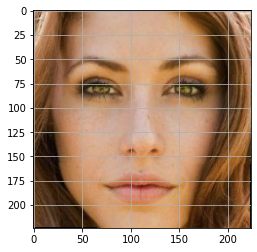

In [ ]:
plt.grid()
plt.imshow(a[..., ::-1][0,...])

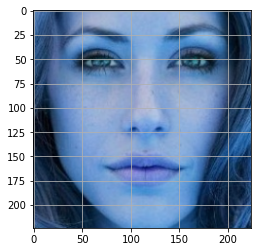

In [ ]:
plt.grid()
plt.imshow(aa[0,...])

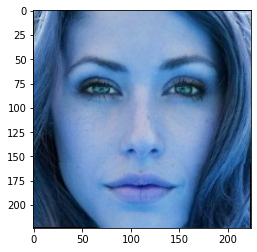

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(a[0,...])

In [ ]:
result = DeepFace.verify(img1_path = "./Amanda Crew0_0.jpg", img2_path = "./Adriana Lima0_0.jpg", model_name = 'ArcFace', detector_backend='mediapipe')
result

{'detector_backend': 'mediapipe',
 'distance': 0.5728524899748371,
 'model': 'ArcFace',
 'similarity_metric': 'cosine',
 'threshold': 0.68,
 'verified': True}

In [ ]:
result = DeepFace.verify(img1_path = "./Amanda Crew0_0.jpg", img2_path = "./Adriana Lima0_0.jpg", model_name = 'ArcFace', detector_backend='retinaface')
result

ValueError: ignored

# Detect

In [7]:
import tensorflow as tf
from tensorflow.python.keras.engine import training
import tensorflow
import numpy as np
from tensorflow import keras
import gdown
import os

In [12]:
arcface_model = tf.keras.models.load_model('/content/drive/MyDrive/arcface.h5')

In [14]:
arcface_model.predict(img1)

array([[-2.11701248e+02,  4.00913143e+00,  5.22018623e+01,
        -6.64173767e+02,  1.02786362e+02,  2.74364807e+02,
         1.31310211e+02,  1.05136810e+02, -6.77974854e+02,
        -1.10523460e+02,  2.59667145e+02,  3.00034393e+02,
         3.58596497e+01, -2.70292902e+00, -5.86963562e+02,
         7.22259979e+01, -3.01437927e+02, -8.83658264e+02,
        -9.86727428e+00, -5.35121887e+02, -8.96851074e+02,
         1.18966995e+02, -1.71810410e+02, -2.05188095e+02,
        -3.39767761e+01, -1.59040695e+02, -1.98581970e+02,
        -8.59158478e+01, -4.44886871e+02,  1.00621758e+02,
         1.09772484e+02,  1.77915115e+02, -4.94901215e+02,
         3.99713318e+02,  3.36050476e+02, -1.21164131e+02,
         2.06172516e+02,  4.91166016e+02, -7.90846939e+01,
         2.18604568e+02,  1.11131508e+02,  1.53275391e+02,
        -1.01652600e+03,  1.02953094e+02, -9.03486450e+02,
         3.56837402e+02,  8.62246094e+01,  1.97196609e+02,
        -3.63134430e+02,  3.80913330e+02, -3.96206299e+0

In [13]:
img1 = tf.io.read_file('./Amanda Crew0_0_112x112.jpg')
img1 = tf.io.decode_image(img1)
img1 = tf.cast(img1, tf.float32)[None,...]
# tf.image.resize(img1, (112,112))
img1

<tf.Tensor: shape=(1, 112, 112, 3), dtype=float32, numpy=
array([[[[204., 209., 189.],
         [198., 206., 185.],
         [197., 205., 184.],
         ...,
         [192., 186., 138.],
         [198., 189., 148.],
         [202., 193., 154.]],

        [[208., 213., 193.],
         [208., 216., 195.],
         [205., 213., 192.],
         ...,
         [196., 189., 143.],
         [201., 192., 151.],
         [203., 194., 155.]],

        [[211., 219., 198.],
         [214., 222., 201.],
         [215., 223., 202.],
         ...,
         [204., 197., 153.],
         [205., 197., 158.],
         [204., 196., 159.]],

        ...,

        [[ 90.,  62.,  41.],
         [101.,  74.,  53.],
         [ 86.,  64.,  43.],
         ...,
         [221., 193., 169.],
         [251., 235., 219.],
         [238., 231., 215.]],

        [[102.,  74.,  52.],
         [ 91.,  65.,  42.],
         [ 68.,  43.,  23.],
         ...,
         [207., 175., 150.],
         [248., 232., 216.],
         

# ArcFace

**Reference study:** 
- The faces are cropped and resized to 112×112, 
- and each pixel (ranged between [0, 255]) in RGB images is normalised by subtracting 127.5 then divided by 128.
- Threshold of 0.68 for arcface, and 0.4 for base.

In [ ]:
img1 = tf.io.read_file('./Amanda Crew0_0.jpg')
img1 = tf.io.decode_image(img1)
img2 = tf.io.read_file('./Adriana Lima0_0.jpg')
img2 = tf.io.decode_image(img2)

def preprocess(img):
    img = tf.image.resize_with_pad(img, 112, 112)
    img = img / 255
    # img -= 127.5
    # img /= 128
    return img
img1 = preprocess(img1)
img2 = preprocess(img2)

In [ ]:

def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

In [ ]:
arcface_model = tf.keras.models.load_model('/content/drive/MyDrive/arcface.h5')
def compare(img1,img2):
    rep1 = arcface_model.predict(img1[None,...]).reshape(-1)
    rep2 = arcface_model.predict(img2[None,...]).reshape(-1)
    dist1 = findCosineDistance(rep1,rep2)
    dist2 = tf.losses.cosine_similarity(rep1,rep2)
    return dist1,dist2

In [ ]:
compare(tf.image.resize(a1[0,...], (112,112)),tf.image.resize(a2[0,...], (112,112))), compare(tf.image.resize(a1[0,...], (112,112)),tf.image.resize(a3[0,...], (112,112)))

((0.568039745092392, <tf.Tensor: shape=(), dtype=float32, numpy=-0.43196023>),
 (0.7714059948921204, <tf.Tensor: shape=(), dtype=float32, numpy=-0.228594>))

In [ ]:
compare(tf.image.resize(a1[0,...], (112,112))*2-1,tf.image.resize(a2[0,...], (112,112))*2-1), compare(tf.image.resize(a1[0,...], (112,112))*2 - 1,tf.image.resize(a3[0,...], (112,112))*2-1)

((0.5221405625343323, <tf.Tensor: shape=(), dtype=float32, numpy=-0.47785944>),
 (0.9616216532886028,
  <tf.Tensor: shape=(), dtype=float32, numpy=-0.038378343>))

In [ ]:
compare(tf.image.resize(a1[0,...], (112,112))*,tf.image.resize(a2[0,...], (112,112))), compare(tf.image.resize(a1[0,...], (112,112)),tf.image.resize(a3[0,...], (112,112)))

((0.487981379032135, <tf.Tensor: shape=(), dtype=float32, numpy=-0.5120186>),
 (0.9615058489143848,
  <tf.Tensor: shape=(), dtype=float32, numpy=-0.038494155>))

In [ ]:
compare(a1[..., ::-1][0,...],a2[..., ::-1][0,...]), compare(a1[..., ::-1][0,...],a3[..., ::-1][0,...])

((0.5115066468715668, <tf.Tensor: shape=(), dtype=float32, numpy=-0.48849338>),
 (0.9811205379664898, <tf.Tensor: shape=(), dtype=float32, numpy=-0.01887945>))

In [ ]:
compare(a1[..., ::-1][0,...],a2[..., ::-1][0,...]), compare(a1[..., ::-1][0,...],a3[..., ::-1][0,...]), compare(a1[..., ::-1][0,...],a4[..., ::-1][0,...])

((0.5115066468715668, <tf.Tensor: shape=(), dtype=float32, numpy=-0.48849338>),
 (0.9811205379664898, <tf.Tensor: shape=(), dtype=float32, numpy=-0.01887945>),
 (0.5115066468715668, <tf.Tensor: shape=(), dtype=float32, numpy=-0.48849338>))

In [ ]:
compare(a1[0,...],a2[0,...]), compare(a1[0,...],a3[0,...]), compare(a3[0,...],a4[0,...])

((0.4876837134361267, <tf.Tensor: shape=(), dtype=float32, numpy=-0.5123162>),
 (0.9596929550170898,
  <tf.Tensor: shape=(), dtype=float32, numpy=-0.040307038>),
 (0.9550837278366089,
  <tf.Tensor: shape=(), dtype=float32, numpy=-0.044916272>))

In [ ]:
compare(a1[0,...],a2[0,...])

(0.4876837134361267, <tf.Tensor: shape=(), dtype=float32, numpy=-0.5123162>)

In [ ]:
compare(img1,img2)

(0.8172268867492676, <tf.Tensor: shape=(), dtype=float32, numpy=-0.18277311>)

In [ ]:
compare(img1,img2)

(0.6434272229671478, <tf.Tensor: shape=(), dtype=float32, numpy=-0.35657278>)

In [ ]:
compare(img1,img2)

In [ ]:
arcface_model = tf.keras.models.load_model('./arcface.h5')

In [ ]:
def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return tf.reduce_mean(1 - (a / (np.sqrt(b) * np.sqrt(c))))

In [ ]:
%%time
a = arcface_model.predict(img[None,...])
# a.shape

CPU times: user 444 ms, sys: 6.06 ms, total: 450 ms
Wall time: 271 ms


In [ ]:
def loadModel(url = 'https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5'):
	base_model = ResNet34()
	inputs = base_model.inputs[0]
	arcface_model = base_model.outputs[0]
	arcface_model = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5)(arcface_model)
	arcface_model = keras.layers.Dropout(0.4)(arcface_model)
	arcface_model = keras.layers.Flatten()(arcface_model)
	arcface_model = keras.layers.Dense(512, activation=None, use_bias=True, kernel_initializer="glorot_normal")(arcface_model)
	embedding = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5, name="embedding", scale=True)(arcface_model)
	model = keras.models.Model(inputs, embedding, name=base_model.name)

	#---------------------------------------
	#check the availability of pre-trained weights
	# home = functions.get_deepface_home()

	file_name = "arcface_weights.h5"
	output = "./" + file_name

	if os.path.isfile(output) != True:

		print(file_name," will be downloaded to ",output)
		gdown.download(url, output, quiet=False)

	#---------------------------------------
	
	model.load_weights(output)

	return model

def ResNet34():

	img_input = tensorflow.keras.layers.Input(shape=(112, 112, 3))

	x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name='conv1_pad')(img_input)
	x = tensorflow.keras.layers.Conv2D(64, 3, strides=1, use_bias=False, kernel_initializer='glorot_normal', name='conv1_conv')(x)
	x = tensorflow.keras.layers.BatchNormalization(axis=3, epsilon=2e-5, momentum=0.9, name='conv1_bn')(x)
	x = tensorflow.keras.layers.PReLU(shared_axes=[1, 2], name='conv1_prelu')(x)
	x = stack_fn(x)

	model = tf.keras.Model(img_input, x, name='ResNet34')

	return model

def block1(x, filters, kernel_size=3, stride=1, conv_shortcut=True, name=None):
	bn_axis = 3

	if conv_shortcut:
		shortcut = tensorflow.keras.layers.Conv2D(filters, 1, strides=stride, use_bias=False, kernel_initializer='glorot_normal', name=name + '_0_conv')(x)
		shortcut = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_0_bn')(shortcut)
	else:
		shortcut = x

	x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_1_bn')(x)
	x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name=name + '_1_pad')(x)
	x = tensorflow.keras.layers.Conv2D(filters, 3, strides=1, kernel_initializer='glorot_normal', use_bias=False, name=name + '_1_conv')(x)
	x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_2_bn')(x)
	x = tensorflow.keras.layers.PReLU(shared_axes=[1, 2], name=name + '_1_prelu')(x)

	x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name=name + '_2_pad')(x)
	x = tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=stride, kernel_initializer='glorot_normal', use_bias=False, name=name + '_2_conv')(x)
	x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_3_bn')(x)

	x = tensorflow.keras.layers.Add(name=name + '_add')([shortcut, x])
	return x

def stack1(x, filters, blocks, stride1=2, name=None):
	x = block1(x, filters, stride=stride1, name=name + '_block1')
	for i in range(2, blocks + 1):
		x = block1(x, filters, conv_shortcut=False, name=name + '_block' + str(i))
	return x

def stack_fn(x):
	x = stack1(x, 64, 3, name='conv2')
	x = stack1(x, 128, 4, name='conv3')
	x = stack1(x, 256, 6, name='conv4')
	return stack1(x, 512, 3, name='conv5')

In [ ]:
m = loadModel()

arcface_weights.h5  will be downloaded to  ./arcface_weights.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/arcface_weights.h5
To: /content/arcface_weights.h5
100%|██████████| 137M/137M [00:01<00:00, 123MB/s]


In [ ]:
m.save('./arcface.h5')

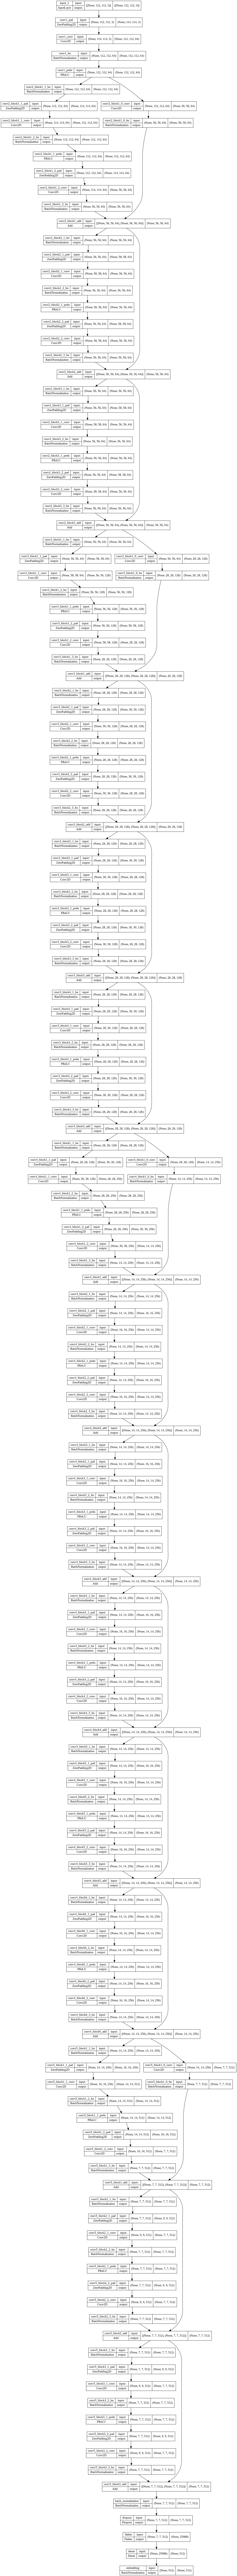

In [ ]:
tf.keras.utils.plot_model(m, show_shapes=True, expand_nested=True)

In [ ]:
m.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 112, 112, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 114, 114, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  1728        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
def preprocess_face(img, target_size=(224, 224), grayscale = False, enforce_detection = True, detector_backend = 'opencv', return_region = False, align = True):

	#img might be path, base64 or numpy array. Convert it to numpy whatever it is.
	img = load_image(img)
	base_img = img.copy()

	img, region = detect_face(img = img, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection, align = align)

	#--------------------------

	if img.shape[0] == 0 or img.shape[1] == 0:
		if enforce_detection == True:
			raise ValueError("Detected face shape is ", img.shape,". Consider to set enforce_detection argument to False.")
		else: #restore base image
			img = base_img.copy()

	#--------------------------

	#post-processing
	if grayscale == True:
		img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

	#---------------------------------------------------
	#resize image to expected shape

	# img = cv2.resize(img, target_size) #resize causes transformation on base image, adding black pixels to resize will not deform the base image

	if img.shape[0] > 0 and img.shape[1] > 0:
		factor_0 = target_size[0] / img.shape[0]
		factor_1 = target_size[1] / img.shape[1]
		factor = min(factor_0, factor_1)

		dsize = (int(img.shape[1] * factor), int(img.shape[0] * factor))
		img = cv2.resize(img, dsize)

		# Then pad the other side to the target size by adding black pixels
		diff_0 = target_size[0] - img.shape[0]
		diff_1 = target_size[1] - img.shape[1]
		if grayscale == False:
			# Put the base image in the middle of the padded image
			img = np.pad(img, ((diff_0 // 2, diff_0 - diff_0 // 2), (diff_1 // 2, diff_1 - diff_1 // 2), (0, 0)), 'constant')
		else:
			img = np.pad(img, ((diff_0 // 2, diff_0 - diff_0 // 2), (diff_1 // 2, diff_1 - diff_1 // 2)), 'constant')

	#------------------------------------------

	#double check: if target image is not still the same size with target.
	if img.shape[0:2] != target_size:
		img = cv2.resize(img, target_size)

	#---------------------------------------------------

	#normalizing the image pixels

	img_pixels = image.img_to_array(img) #what this line doing? must?
	img_pixels = np.expand_dims(img_pixels, axis = 0)
	img_pixels /= 255 #normalize input in [0, 1]

	#---------------------------------------------------

	if return_region == True:
		return img_pixels, region
	else:
		return img_pixels

In [ ]:
def represent(img_path, model_name = 'VGG-Face', model = None, enforce_detection = True, detector_backend = 'opencv', align = True, normalization = 'base'):

	"""
	This function represents facial images as vectors.
	Parameters:
		img_path: exact image path, numpy array or based64 encoded images could be passed.
		model_name (string): VGG-Face, Facenet, OpenFace, DeepFace, DeepID, Dlib, ArcFace.
		model: Built deepface model. A face recognition model is built every call of verify function. You can pass pre-built face recognition model optionally if you will call verify function several times. Consider to pass model if you are going to call represent function in a for loop.
			model = DeepFace.build_model('VGG-Face')
		enforce_detection (boolean): If any face could not be detected in an image, then verify function will return exception. Set this to False not to have this exception. This might be convenient for low resolution images.
		detector_backend (string): set face detector backend as retinaface, mtcnn, opencv, ssd or dlib
		normalization (string): normalize the input image before feeding to model
	Returns:
		Represent function returns a multidimensional vector. The number of dimensions is changing based on the reference model. E.g. FaceNet returns 128 dimensional vector; VGG-Face returns 2622 dimensional vector.
	"""

	if model is None:
		model = build_model(model_name)

	#---------------------------------

	#decide input shape
	input_shape_x, input_shape_y = functions.find_input_shape(model)

	#detect and align
	img = functions.preprocess_face(img = img_path
		, target_size=(input_shape_y, input_shape_x)
		, enforce_detection = enforce_detection
		, detector_backend = detector_backend
		, align = align)

	#---------------------------------
	#custom normalization

	img = functions.normalize_input(img = img, normalization = normalization)

	#---------------------------------

	#represent
	embedding = model.predict(img)[0].tolist()

	return embedding